In [10]:

library(tidyverse)
library(readxl)


In [34]:
gallstone_data <- read_excel("dataset-uci.xlsx")
head(gallstone_data)

Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,⋯,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,50,0,0,0,0,0,0,185,92.8,⋯,40,134,20,22,87,0.82,112.47,0,16.0,33.0
0,47,0,1,0,0,0,0,176,94.5,⋯,43,103,14,13,46,0.87,107.10,0,14.4,25.0
0,61,0,0,0,0,0,0,171,91.1,⋯,43,69,18,14,66,1.25,65.51,0,16.2,30.2
0,41,0,0,0,0,0,0,168,67.7,⋯,59,53,20,12,34,1.02,94.10,0,15.4,35.4
0,42,0,0,0,0,0,0,178,89.6,⋯,30,326,27,54,71,0.82,112.47,0,16.8,40.6
0,96,0,0,0,0,0,0,155,49.0,⋯,30,65,13,13,60,1.46,43.74,0,11.0,45.8


## Section 1 : Data Description

The data set that my group will be working with is the Gallstone data set. A gallstone is a solid clump that forms in the gallbladder and is typically composed of bile, such as cholesterol or bilirubin, which is a substance that forms when red blood cells break down. 

In [35]:
nrow(gallstone_data)

[1] 319

In [36]:
ncol(gallstone_data)

[1] 39

This data set contains 319 observations and has 38 variables all of which I will provide a brief description for. 


### Gallstone status (Categorical)
- 1 for people with gallstones; 0 otherwise
### Age (Numerical)
- Values range from 20-96
### Sex (categorical)
- 0 for male; 1 for female
### Comorbidity (Categorical)
- 1 if the person has comorbidities (if a person has 2 or more medical conditions); 0 otherwise 
### Hypertension (Categorical)
- 1 if the person has hypertension; 0 otherwise
- Used to determine comorbidity
### Hyperthyroidism (Categorical)
- 1 if the person has hyperthyroidism; 0 otherwise
- Used to determine comorbidity
### Hyperlipidemia (Categorical)
- 1 if the person has hyperlipidemia; 0 otherwise
- Used to determine comorbidity
### Diabetes mellitus (Categorical)
- 1 if the person has diabetes mellitus
- Used to determine comorbidity
### Height (Numerical)
- Person’s height measured in cm
- Measured while the person is barefoot
### Weight (Numerical)
- Person’s weight measured in kg
- Measured while the person is wearing thin clothing <0.1kg
### BMI (Numerical)
- Indicator of obesity calculated by weight (kg) / height^2 (m^2)

### Hepatic fat accumulation (Numerical)
- Measured using ultrasonography


 Biomedical impedance analysis (BIA) was performed by all participants using the Tanita MC780 device and was used to determine the following variables: **total body water**, **extracellular water**, and **intracellular water**, measured in kilograms. The **total body fat ratio**, **lean mass**, **degree of obesity**, and **protein content of the body** are presented as percentages. **Bone mass**, **muscle mass**, **total fat content**, **visceral fat area**, and **visceral muscle area** were measured in kilograms. 

The following variables were measured from a blood test: **glucose levels (mg/dL)**, **total cholesterol (mg/dL)**, **LDL cholesterol (mg/dL)**, **HDL cholesterol (mg/dL)**, **triglycerides (mg/dL)**, **aspartat aminotransferaz (U/L)**, **ALT (U/L)**, **alkalen fosfataz (U/L)**, **creatinine (mg/dL)**, **GFR (ml/seconds)**, **CRP level (mg/L)**, **hemoglobin count (g/dL)**, and **vitamin D concentration (ng/mL)**.


For this analysis, I will be including variables that relate to a person’s overall health, primarily related to obesity or factors that relate to obesity. The following variables will be included in my exploration of the data: **Gallstone status**, **Sex**, **Diabetes mellitus**, **Height**, **Weight**, **BMI**, **total body fat ratio**, **degree of obesity**, **total fat content**, **hepatic fat accumulation**, **total cholesterol**, **LDL cholesterol**, and **HDL cholesterol**. The reason for the inclusion of factors is that since gallstones typically consist of cholesterol, I want to see the effect of obesity on the formation of gallstones. 

## Section 2: Scientific Question

For this exploration, I want to explore the association between gallstone formation and factors of personal health relating to obesity. The response of this exploration is variable **gallstone status**, which is a categorical variable taking on the value 1 if the person has a gallstone, and 0 otherwise. This is a exploration is a prediction, and I will try to determine whether a person is at risk of getting gallstone disease by using the factors of personal health that relate to obesity. 

## Section 3: Exploratory Analysis and Visualization

As shown above, the data can be loaded into R, and is already in tidy format, with each variable forming a column, each observation forming a row, and each cell representing a single value. I will use the janitor library to clean the column names to make them easier to work with.

gallstone_status,age,gender,comorbidity,coronary_artery_disease_cad,hypothyroidism,hyperlipidemia,diabetes_mellitus_dm,height,weight,⋯,high_density_lipoprotein_hdl,triglyceride,aspartat_aminotransferaz_ast,alanin_aminotransferaz_alt,alkaline_phosphatase_alp,creatinine,glomerular_filtration_rate_gfr,c_reactive_protein_crp,hemoglobin_hgb,vitamin_d
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No Gallstones,50,0,0,0,0,0,0,185,92.8,⋯,40,134,20,22,87,0.82,112.47,0,16.0,33.0
No Gallstones,47,0,1,0,0,0,0,176,94.5,⋯,43,103,14,13,46,0.87,107.10,0,14.4,25.0
No Gallstones,61,0,0,0,0,0,0,171,91.1,⋯,43,69,18,14,66,1.25,65.51,0,16.2,30.2
No Gallstones,41,0,0,0,0,0,0,168,67.7,⋯,59,53,20,12,34,1.02,94.10,0,15.4,35.4
No Gallstones,42,0,0,0,0,0,0,178,89.6,⋯,30,326,27,54,71,0.82,112.47,0,16.8,40.6
No Gallstones,96,0,0,0,0,0,0,155,49.0,⋯,30,65,13,13,60,1.46,43.74,0,11.0,45.8


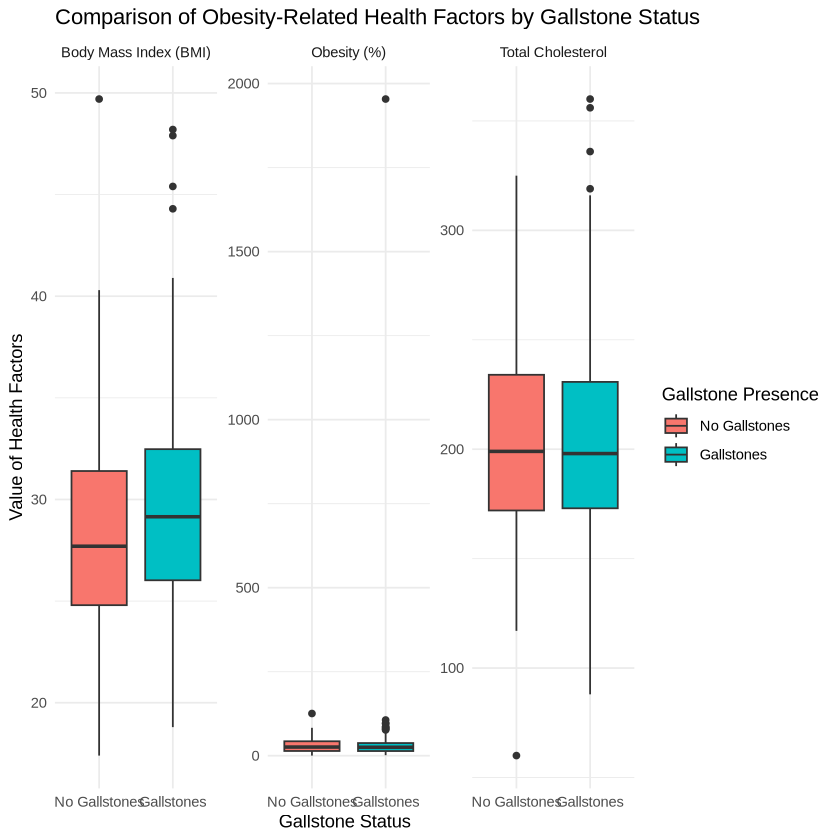

In [50]:
library(janitor)

gallstone_data <- clean_names(gallstone_data)
head(gallstone_data)


gallstone_data <- gallstone_data %>%
  mutate(gallstone_status = factor(gallstone_status, labels = c("No Gallstones", "Gallstones")))

plot_data <- gallstone_data %>%
  select(gallstone_status, body_mass_index_bmi, obesity_percent, total_cholesterol_tc) %>%
  pivot_longer(cols = c(body_mass_index_bmi, obesity_percent, total_cholesterol_tc),
               names_to = "Health_Factor",
               values_to = "Value")

boxplot_labels <- c(
  body_mass_index_bmi = "Body Mass Index (BMI)",
  obesity_percent = "Obesity (%)",
  total_cholesterol_tc = "Total Cholesterol"
)


ggplot(plot_data, aes(x = gallstone_status, y = Value, fill = gallstone_status)) +
  geom_boxplot() +
  facet_wrap(~ Health_Factor, scales = "free_y", labeller = labeller(Health_Factor = boxplot_labels)) +
  labs(
    title = "Comparison of Obesity-Related Health Factors by Gallstone Status",
    x = "Gallstone Status",
    y = "Value of Health Factors",
    fill = "Gallstone Presence"
  ) +
  theme_minimal()

This plot shows obesity-related health factors that I picked, namely BMI, obesity percentage, and total cholesterol, against gallstone presence in order to observe any trends or correlation. The boxplots do not have any immediate discernible pattern and do not show an immediate correlation between obesity-related health factors and gallstone presence. For BMI, those with gallstones have a higher mean BMI in comparison to those without, but obesity percent and total cholesterol do not share this trend. It is also important to note that there are some notable outliers, especially for those with gallstones, in each of the three boxplots, which could potentially affect the overall trend that these plots would show. There are other, more specific indicators of obesity-related health factors that could potentially show a more visible correlation with gallstone presence; however, the reason I picked these variables is due to their relative ease of access.  